In [3]:
from mnist import MNIST
import numpy as np
from scipy import linalg
import random
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import torch

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
mndata = MNIST('./data/')
x_train, y_train = map(np.array, mndata.load_training())
x_test, y_test = map(np.array, mndata.load_testing())
x_train = torch.FloatTensor(x_train/255.0)
y_train = torch.tensor(y_train)
x_test = torch.FloatTensor(x_test/255.0)
y_test = torch.tensor(y_test)


In [4]:
def init_W():
    d = 784
    h = 64
    k = 10
    alpha1 = (1/d)**0.5
    alpha2 = (1/h)**0.5
    W_0 = np.random.uniform(-alpha1, alpha1,(h,d))
    W_1 = np.random.uniform(-alpha2, alpha2,(k,h))
    b_0 = np.zeros((h,1))
    b_1 = np.zeros((k,1))
    W_0 = torch.FloatTensor(W_0).requires_grad_(True)
    W_1 = torch.FloatTensor(W_1).requires_grad_(True)
    b_0 = torch.FloatTensor(b_0).requires_grad_(True)
    b_1 = torch.FloatTensor(b_1).requires_grad_(True)
    return W_0,W_1,b_0,b_1

def fit_gd_cross_entropy(x_train, y_train,x_test,y_test):
    W_0,W_1,b_0,b_1 = init_W()
    loss_prev = 0
    d_loss = 1
    loss = 1
    accuracy = 0
    ep = 0
    batchsize = 1000
    nbatch = int(x_train.shape[0]/batchsize)
    train_accuracy_list = []
    test_accuracy_list = []
    train_loss_list = []
    test_loss_list = []
    traccuracy = 0
    taccuracy = 0
    while traccuracy <0.99:
        ep = ep+1
        accuracy_list = []
        for i in range(0, nbatch):
            x = x_train[i*batchsize:(i+1)*batchsize]
            y = y_train[i*batchsize:(i+1)*batchsize]
            optim = torch.optim.Adam([W_0,W_1,b_0,b_1], lr=1e-3)
            x_1 = torch.matmul(W_0, x.T) + b_0
            x_1 = torch.nn.functional.relu(x_1)
            y_hat = torch.matmul(W_1, x_1) + b_1
            #y_hat = torch.nn.functional.relu(y_hat)
            y_hat = y_hat.T
            loss = torch.nn.functional.cross_entropy(y_hat, y.long())
            optim.zero_grad()
            loss.backward()
            accuracy = float(torch.sum(torch.argmax(y_hat, axis=1) == y)) / float(y.shape[0])
            #accuracy_list.append(accuracy)
            optim.step()
        xtr_1 = torch.matmul(W_0, x_train.T) + b_0
        xtr_1 = torch.nn.functional.relu(xtr_1)
        ytr_hat = torch.matmul(W_1, xtr_1) + b_1
        #yt_hat = torch.nn.functional.relu(yt_hat)
        ytr_hat = ytr_hat.T
        train_loss = torch.nn.functional.cross_entropy(ytr_hat, y_train.long())
        traccuracy = float(torch.sum(torch.argmax(ytr_hat, axis=1) == y_train)) / float(y_train.shape[0])
        xt_1 = torch.matmul(W_0, x_test.T) + b_0
        xt_1 = torch.nn.functional.relu(xt_1)
        yt_hat = torch.matmul(W_1, xt_1) + b_1
        #yt_hat = torch.nn.functional.relu(yt_hat)
        yt_hat = yt_hat.T
        test_loss = torch.nn.functional.cross_entropy(yt_hat, y_test.long())
        taccuracy = float(torch.sum(torch.argmax(yt_hat, axis=1) == y_test)) / float(y_test.shape[0])
        train_accuracy_list.append(traccuracy)
        test_accuracy_list.append(taccuracy)
        train_loss_list.append(train_loss)
        test_loss_list.append(test_loss)
        #print("epoch {}, accurracy on training dataset{}, accuracy on test dataset{} ".format(ep,traccuracy,taccuracy))
    print("Finally epoch {}, accurracy on training dataset {}, accuracy on test dataset {}; loss on training {} loss on test{} ".format(ep,traccuracy,taccuracy,train_loss,test_loss))
    return(train_accuracy_list, test_accuracy_list,ep,train_loss_list,test_loss_list)

def plot(train_loss_list,ep,plot_name):
    plt.clf()
    sns.set()
    plt.plot(range(1,ep+1),train_loss_list,'-',label ='train loss')
    #plt.plot(range(1,ep+1),test_loss_list,'-',label ='test loss')
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    #plt.ylim(0,1)
    plt.savefig('./'+plot_name)

def init_W2():
    d = 784
    h0 = 32
    h1 = 32
    k = 10
    alpha1 = (1/d)**0.5
    alpha2 = (1/h0)**0.5
    alpha3 = (1/h1)**0.5
    W_0 = np.random.uniform(-alpha1, alpha1,(h0,d))
    W_1 = np.random.uniform(-alpha2, alpha2,(h1,h0))
    W_2 = np.random.uniform(-alpha3, alpha3,(k,h1))
    b_0 = np.zeros((h0,1))
    b_1 = np.zeros((h1,1))
    b_2 = np.zeros((k,1))
    W_0 = torch.FloatTensor(W_0).requires_grad_(True)
    W_1 = torch.FloatTensor(W_1).requires_grad_(True)
    W_2 = torch.FloatTensor(W_2).requires_grad_(True)
    b_2 = torch.FloatTensor(b_2).requires_grad_(True)
    b_0 = torch.FloatTensor(b_0).requires_grad_(True)
    b_1 = torch.FloatTensor(b_1).requires_grad_(True)

    return W_0,W_1,W_2,b_0,b_1,b_2

def fit_gd_cross_entropy2(x_train, y_train,x_test,y_test):
    W_0,W_1,W_2,b_0,b_1,b_2 = init_W2()
    loss_prev = 0
    d_loss = 1
    loss = 1
    accuracy = 0
    ep = 0
    batchsize = 1000
    nbatch = int(x_train.shape[0]/batchsize)
    train_accuracy_list = []
    test_accuracy_list = []
    train_loss_list = []
    test_loss_list = []
    traccuracy = 0
    taccuracy = 0
    while traccuracy <0.99:
        ep = ep+1
        accuracy_list = []
        for i in range(0, nbatch):
            x = x_train[i*batchsize:(i+1)*batchsize]
            y = y_train[i*batchsize:(i+1)*batchsize]
            optim = torch.optim.Adam([W_0,W_1,b_0,b_1], lr=1e-2)
            x_1 = torch.matmul(W_0, x.T) + b_0
            x_1 = torch.nn.functional.relu(x_1)
            x_2 = torch.matmul(W_1, x_1) + b_1
            x_2 = torch.nn.functional.relu(x_2)
            y_hat = torch.matmul(W_2, x_2) + b_2
            #y_hat = torch.nn.functional.relu(y_hat)
            y_hat = y_hat.T
            loss = torch.nn.functional.cross_entropy(y_hat, y.long())
            optim.zero_grad()
            loss.backward()
            accuracy = float(torch.sum(torch.argmax(y_hat, axis=1) == y)) / float(y.shape[0])
            #accuracy_list.append(accuracy)
            optim.step()
        xtr_1 = torch.matmul(W_0, x_train.T) + b_0
        xtr_1 = torch.nn.functional.relu(xtr_1)
        xtr_2 = torch.matmul(W_1, xtr_1) + b_1
        xtr_2 = torch.nn.functional.relu(xtr_2)
        ytr_hat = torch.matmul(W_2, xtr_2) + b_2
        #yt_hat = torch.nn.functional.relu(yt_hat)
        ytr_hat = ytr_hat.T
        train_loss = torch.nn.functional.cross_entropy(ytr_hat, y_train.long())
        traccuracy = float(torch.sum(torch.argmax(ytr_hat, axis=1) == y_train)) / float(y_train.shape[0])
        xt_1 = torch.matmul(W_0, x_test.T) + b_0
        xt_1 = torch.nn.functional.relu(xt_1)
        xt_2 = torch.matmul(W_1, xt_1) + b_1
        xt_2 = torch.nn.functional.relu(xt_2)
        yt_hat = torch.matmul(W_2, xt_2) + b_2
        #yt_hat = torch.nn.functional.relu(yt_hat)
        yt_hat = yt_hat.T
        test_loss = torch.nn.functional.cross_entropy(yt_hat, y_test.long())
        taccuracy = float(torch.sum(torch.argmax(yt_hat, axis=1) == y_test)) / float(y_test.shape[0])
        train_accuracy_list.append(traccuracy)
        test_accuracy_list.append(taccuracy)
        train_loss_list.append(train_loss)
        test_loss_list.append(test_loss)
        print(" epoch {}, accurracy on training dataset {}, accuracy on test dataset {}; loss on training {} loss on test{} ".format(ep,traccuracy,taccuracy,train_loss,test_loss))
        #print("epoch {}, accurracy on training dataset{}, accuracy on test dataset{} ".format(ep,traccuracy,taccuracy))
    #print("Finally epoch {}, accurracy on training dataset{}, accuracy on test dataset{} ".format(ep,traccuracy,taccuracy))
    print("Finally epoch {}, accurracy on training dataset {}, accuracy on test dataset {}; loss on training {} loss on test{} ".format(ep,traccuracy,taccuracy,train_loss,test_loss))
    return(train_accuracy_list, test_accuracy_list,ep,train_loss_list,test_loss_list)


In [ ]:
train_accuracy_list, test_accuracy_list,ep,train_loss_list,test_loss_list = fit_gd_cross_entropy(x_train, y_train,x_test,y_test)
plot(train_loss_list,ep,'a51.png')


 epoch 1, accurracy on training dataset 0.8062333333333334, accuracy on test dataset 0.8111; loss on training 0.6269136071205139 loss on test0.6178123950958252 
 epoch 2, accurracy on training dataset 0.8828333333333334, accuracy on test dataset 0.8873; loss on training 0.38648170232772827 loss on test0.3818037211894989 
 epoch 3, accurracy on training dataset 0.89855, accuracy on test dataset 0.8991; loss on training 0.3175697326660156 loss on test0.3184337317943573 
 epoch 4, accurracy on training dataset 0.9270666666666667, accuracy on test dataset 0.9265; loss on training 0.24751730263233185 loss on test0.2501721978187561 
 epoch 5, accurracy on training dataset 0.9353166666666667, accuracy on test dataset 0.933; loss on training 0.2148227095603943 loss on test0.22233837842941284 
 epoch 6, accurracy on training dataset 0.9432333333333334, accuracy on test dataset 0.9391; loss on training 0.18918219208717346 loss on test0.1981620043516159 
 epoch 7, accurracy on training dataset 0.

 epoch 54, accurracy on training dataset 0.9797833333333333, accuracy on test dataset 0.9559; loss on training 0.078181691467762 loss on test0.25317466259002686 
 epoch 55, accurracy on training dataset 0.97375, accuracy on test dataset 0.9512; loss on training 0.10031066834926605 loss on test0.2923891246318817 
 epoch 56, accurracy on training dataset 0.9747666666666667, accuracy on test dataset 0.9506; loss on training 0.09545282274484634 loss on test0.29304903745651245 
 epoch 57, accurracy on training dataset 0.9766833333333333, accuracy on test dataset 0.9526; loss on training 0.08973167091608047 loss on test0.2879754900932312 
 epoch 58, accurracy on training dataset 0.9757833333333333, accuracy on test dataset 0.9521; loss on training 0.09371744096279144 loss on test0.2933037579059601 
 epoch 59, accurracy on training dataset 0.9796166666666667, accuracy on test dataset 0.9556; loss on training 0.0798182263970375 loss on test0.26673558354377747 
 epoch 60, accurracy on training 

 epoch 106, accurracy on training dataset 0.9821833333333333, accuracy on test dataset 0.956; loss on training 0.08354117721319199 loss on test0.42984798550605774 
 epoch 107, accurracy on training dataset 0.98215, accuracy on test dataset 0.956; loss on training 0.08536242693662643 loss on test0.4404140114784241 
 epoch 108, accurracy on training dataset 0.9829166666666667, accuracy on test dataset 0.9565; loss on training 0.08402208983898163 loss on test0.4402032196521759 
 epoch 109, accurracy on training dataset 0.9822, accuracy on test dataset 0.9552; loss on training 0.08902964740991592 loss on test0.4504562020301819 
 epoch 110, accurracy on training dataset 0.9815666666666667, accuracy on test dataset 0.955; loss on training 0.08583610504865646 loss on test0.444577157497406 
 epoch 111, accurracy on training dataset 0.9826166666666667, accuracy on test dataset 0.9553; loss on training 0.08418342471122742 loss on test0.44404277205467224 
 epoch 112, accurracy on training dataset

 epoch 158, accurracy on training dataset 0.9833666666666666, accuracy on test dataset 0.9546; loss on training 0.09181675314903259 loss on test0.7045813798904419 
 epoch 159, accurracy on training dataset 0.9858, accuracy on test dataset 0.9545; loss on training 0.07795766741037369 loss on test0.7000687718391418 
 epoch 160, accurracy on training dataset 0.98455, accuracy on test dataset 0.9547; loss on training 0.0867539793252945 loss on test0.6984108686447144 
 epoch 161, accurracy on training dataset 0.9867, accuracy on test dataset 0.9556; loss on training 0.07470854371786118 loss on test0.6954549551010132 
 epoch 162, accurracy on training dataset 0.9850666666666666, accuracy on test dataset 0.9559; loss on training 0.0852050632238388 loss on test0.7001254558563232 
 epoch 163, accurracy on training dataset 0.9857333333333334, accuracy on test dataset 0.9554; loss on training 0.07715557515621185 loss on test0.7079327702522278 
 epoch 164, accurracy on training dataset 0.987316666

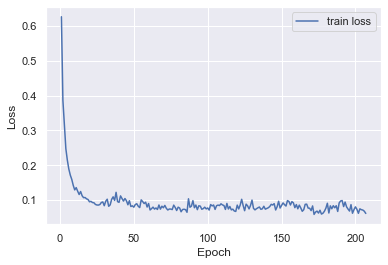

In [5]:
train_accuracy_list, test_accuracy_list,ep,train_loss_list,test_loss_list = fit_gd_cross_entropy2(x_train, y_train,x_test,y_test)
plot(train_loss_list,ep,'a52.png')